Client is asking for some changes in the data (Practice Exercises):

1) Transaction ID format must be: "###"
2) Date format must be: "YYYY-MM-DD"
3) Customer ID format must be: "C-###"
4) Add a "Total Amount" column, where it shows the total price paid for each transaction
5) Add a "Season" column

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot

# SHOW THE DATAFRAME

In [2]:
df = pd.read_csv('retail_sales_dataset.csv')
df.sample(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit
507,508,8/11/2023,CUST508,Male,58,Beauty,2,300
98,99,12/17/2023,CUST099,Female,50,Electronics,4,300
820,821,2/14/2023,CUST821,Male,49,Electronics,1,300
165,166,4/2/2023,CUST166,Male,34,Clothing,4,500
712,713,1/14/2023,CUST713,Male,34,Beauty,3,25
618,619,10/13/2023,CUST619,Male,47,Electronics,4,25
892,893,4/21/2023,CUST893,Male,49,Electronics,1,50
481,482,4/27/2023,CUST482,Female,28,Clothing,4,300
638,639,5/13/2023,CUST639,Female,62,Beauty,4,50
108,109,10/18/2023,CUST109,Female,34,Electronics,4,500


In [3]:
df.shape

(1000, 8)

## CHECK FOR ANY DUPLICATE IN THE ID COLUMNS

In [4]:
df[df["Customer ID"].duplicated() ]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit


In [5]:
df[df["Transaction ID"].duplicated() ]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit


## CHECK FOR NULL VALUES

In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
dtype: int64

## CHECK IF THE DATE COLUMN IS CONSIDERED AS DATE TYPE

In [7]:
df["Date"].dtype

dtype('O')

In [8]:
df["Date"] = pd.to_datetime(df["Date"], format = "%m/%d/%Y")
df["Date"]

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]

# EXPLORATORY DATA ANALYSIS

In [9]:
df[["Age","Price per Unit"]].describe()

,Age,Price per Unit
count,1000.00000,1000.000000
mean,41.39200,179.890000
std,13.68143,189.681356
min,18.00000,25.000000
25%,29.00000,30.000000
50%,42.00000,50.000000
75%,53.00000,300.000000
max,64.00000,500.000000


<Axes: ylabel='Frequency'>

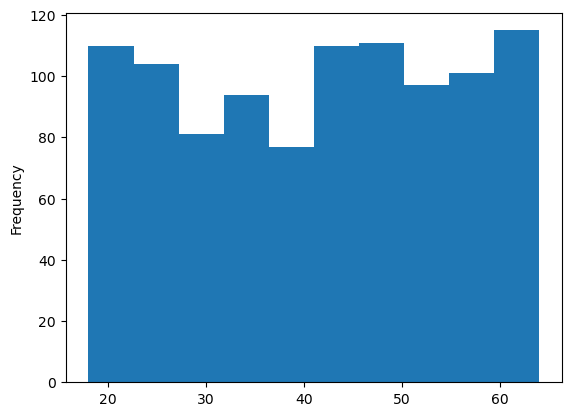

In [10]:
df["Age"].plot(kind="hist")

# DATA TRANSFORMATION

1) Transaction ID format must be: "###"

In [12]:
df["Transaction ID"] = df["Transaction ID"].astype(str).str.zfill(3)
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit
919,920,2023-02-22,CUST920,Female,28,Beauty,3,25
949,950,2023-11-07,CUST950,Male,36,Clothing,3,300
856,857,2023-12-31,CUST857,Male,60,Electronics,2,25
668,669,2023-06-19,CUST669,Male,24,Beauty,4,300
60,061,2023-04-09,CUST061,Male,21,Beauty,4,50


2) Date format must be: "YYYY-MM-DD"

In [13]:
df["Date"] = df["Date"].dt.strftime("%Y-%m-%d")
pd.to_datetime( df["Date"], format = "%Y-%m-%d")
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit
221,222,2023-04-26,CUST222,Male,51,Clothing,4,30
572,573,2023-09-19,CUST573,Male,49,Beauty,2,30
383,384,2023-08-13,CUST384,Male,55,Clothing,1,500
460,461,2023-03-25,CUST461,Female,18,Beauty,2,500
611,612,2023-08-06,CUST612,Female,61,Electronics,1,500


In [21]:
df["Date"] = pd.to_datetime( df["Date"], format = "%Y-%m-%d")
df["Date"].dtype

dtype('<M8[ns]')

3) Customer ID format must be: "C-###"

In [14]:
df["Customer ID"] = df["Customer ID"].str.replace("UST","-")
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit
27,028,2023-04-23,C-028,Female,43,Beauty,1,500
363,364,2023-08-23,C-364,Female,19,Beauty,1,500
876,877,2023-06-19,C-877,Female,58,Clothing,1,25
240,241,2023-09-21,C-241,Female,23,Electronics,3,25
464,465,2023-04-02,C-465,Female,43,Electronics,3,50


4) Add a "Total Amount" column, where it shows de total price paid for each transaction

In [15]:
df["Total Amount"] = df["Quantity"] * df["Price per Unit"]
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
709,710,2023-10-31,C-710,Female,26,Electronics,3,500,1500
473,474,2023-07-15,C-474,Female,26,Clothing,3,500,1500
846,847,2023-04-08,C-847,Female,18,Electronics,4,300,1200
451,452,2023-05-08,C-452,Female,48,Clothing,3,500,1500
879,880,2023-08-21,C-880,Male,22,Beauty,2,500,1000


5) Add a "Season" column

In [27]:
def season(date):
    month = date.month
    if month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    elif month in [9,10,11]:
        return "Fall"
    else:
        return "Winter"

df["Season"] = df["Date"].apply(season)
df.sample(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Season
573,574,2023-08-31,C-574,Female,63,Electronics,2,25,50,Summer
755,756,2023-08-27,C-756,Female,62,Electronics,4,300,1200,Summer
145,146,2023-08-28,C-146,Male,38,Clothing,4,50,200,Summer
461,462,2023-04-01,C-462,Male,63,Electronics,4,300,1200,Spring
906,907,2023-01-08,C-907,Female,45,Electronics,1,25,25,Winter
975,976,2023-10-10,C-976,Female,48,Beauty,2,300,600,Fall
527,528,2023-07-06,C-528,Female,36,Clothing,2,30,60,Summer
69,070,2023-02-21,C-070,Female,43,Clothing,1,300,300,Winter
702,703,2023-03-26,C-703,Male,34,Electronics,2,50,100,Spring
422,423,2023-03-08,C-423,Female,27,Clothing,1,25,25,Spring


# EXPORT DF TO A CSV FILE

In [28]:
df.to_csv('retail_sales_final.csv', index=False)